In [ ]:
!nvidia-smi

Mon Jun 14 07:27:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!pip install -q tensorflow_privacy

In [ ]:
!pip install opacus

     |████████████████████████████████| 102kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!ls "../"

bin	 datalab  home	 lib64	opt   run   sys		       tools
boot	 dev	  lib	 media	proc  sbin  tensorflow-1.15.2  usr
content  etc	  lib32  mnt	root  srv   tmp		       var


In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
!gsutil cp -r "/gdrive/My Drive/SVHN3_1.zip" "../SVHN3_1.zip"

Copying file:///gdrive/My Drive/SVHN3_1.zip...
-
Operation completed over 1 objects/140.1 MiB.                                    


In [ ]:
!unzip "../SVHN3_1.zip" -d "../"

Streaming output truncated to the last 5000 lines.
 extracting: ../SVHN3_1/train/0/4883.png  
 extracting: ../SVHN3_1/train/0/10.png  
 extracting: ../SVHN3_1/train/0/3198.png  
 extracting: ../SVHN3_1/train/0/3155.png  
 extracting: ../SVHN3_1/train/0/410.png  
 extracting: ../SVHN3_1/train/0/827.png  
 extracting: ../SVHN3_1/train/0/2121.png  
 extracting: ../SVHN3_1/train/0/362.png  
 extracting: ../SVHN3_1/train/0/276.png  
 extracting: ../SVHN3_1/train/0/2925.png  
 extracting: ../SVHN3_1/train/0/4183.png  
 extracting: ../SVHN3_1/train/0/1173.png  
 extracting: ../SVHN3_1/train/0/1472.png  
 extracting: ../SVHN3_1/train/0/4113.png  
 extracting: ../SVHN3_1/train/0/1295.png  
 extracting: ../SVHN3_1/train/0/421.png  
 extracting: ../SVHN3_1/train/0/777.png  
 extracting: ../SVHN3_1/train/0/2849.png  
 extracting: ../SVHN3_1/train/0/553.png  
 extracting: ../SVHN3_1/train/0/3205.png  
 extracting: ../SVHN3_1/train/0/1913.png  
 extracting: ../SVHN3_1/train/0/520.png  
 extracting: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 extracting: ../SVHN3_1/train/7/37483.png  
 extracting: ../SVHN3_1/train/7/35308.png  
 extracting: ../SVHN3_1/train/7/36019.png  
 extracting: ../SVHN3_1/train/7/37018.png  
 extracting: ../SVHN3_1/train/7/35255.png  
 extracting: ../SVHN3_1/train/7/37376.png  
 extracting: ../SVHN3_1/train/7/39337.png  
 extracting: ../SVHN3_1/train/7/36554.png  
 extracting: ../SVHN3_1/train/7/39438.png  
 extracting: ../SVHN3_1/train/7/37900.png  
 extracting: ../SVHN3_1/train/7/39282.png  
 extracting: ../SVHN3_1/train/7/36411.png  
 extracting: ../SVHN3_1/train/7/39836.png  
 extracting: ../SVHN3_1/train/7/35088.png  
 extracting: ../SVHN3_1/train/7/35279.png  
 extracting: ../SVHN3_1/train/7/35928.png  
 extracting: ../SVHN3_1/train/7/39439.png  
 extracting: ../SVHN3_1/train/7/38132.png  
 extracting: ../SVHN3_1/train/7/37442.png  
 extracting: ../SVHN3_1/train/7/38565.png  
 extracting: ../SVHN3_1/train/7/35090.png  
 extracting: ../SVHN3_1/t

In [ ]:
!ls -lrt

total 4
drwxr-xr-x 1 root root 4096 Jun  1 13:40 sample_data


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from tqdm import tqdm as tqdm
import pandas as pd

import torchvision
import random
import os
import glob
import copy
from torchsummary import summary
from PIL import Image

import opacus

import matplotlib.pyplot as plt

seed = 42
best_model = None
best_loss = 0.
best_test_loss = 0.
best_test_acc = 0.
best_pred_labels = []
true_labels = []

pred_labels = []
test_acc = 0.
test_loss = 0.

# device = torch.device('cuda:0')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# PREPROCESS

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../SVHN3_1/train/"):
  for n in os.listdir("../SVHN3_1/train/"+file):
    pathlist.append("../SVHN3_1/train/"+file+"/"+n)
    label.append(int(file))    

In [ ]:
len(label)

47107

In [ ]:
len(pathlist)

47107

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../SVHN3_1/train/5/26662.png,5
1,../SVHN3_1/train/5/29216.png,5
2,../SVHN3_1/train/5/26062.png,5
3,../SVHN3_1/train/5/28640.png,5
4,../SVHN3_1/train/5/29063.png,5


In [ ]:
len(df)

47107

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/SVHN3_1_train.csv')
df.to_csv('../SVHN3_1_train.csv')
#files.download('../gdrive/My Drive/.csv')

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../SVHN3_1/test/"):
  for n in os.listdir("../SVHN3_1/test/"+file):
    pathlist.append("../SVHN3_1/test/"+file+"/"+n)
    label.append(int(file))    

In [ ]:

len(label)

9500

In [ ]:
len(pathlist)

9500

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../SVHN3_1/test/5/5788.png,5
1,../SVHN3_1/test/5/5627.png,5
2,../SVHN3_1/test/5/5792.png,5
3,../SVHN3_1/test/5/5071.png,5
4,../SVHN3_1/test/5/5583.png,5


In [ ]:
len(df)

9500

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/SVHN3_1_test.csv')
df.to_csv('../SVHN3_1_test.csv')
#files.download('../gdrive/My Drive/.csv')

In [ ]:
class CustomDatasetFromCsvData(Dataset):
    def __init__(self, csv_path, transform=None):
        """
        Custom dataset example for reading data from csv
        Args:
            csv_path (string): path to csv file
            height (int): image height
            width (int): image width
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.data = pd.read_csv(csv_path)
        self.paths = self.data['Paths']
        self.labels = np.asarray(self.data['Labels'])
        #self.height = height
        #self.width = width
        self.transform = transform

    def __getitem__(self, index):
        single_image_label = self.labels[index]
        # Read each 784 pixels and reshape the 1D array ([784]) to 2D array ([28,28])
        img_as_np = Image.open(self.paths[index])
        img_as_np = np.reshape(img_as_np, (32, 32, 3))
        #img_as_np = np.asarray(self.data.iloc[index][1:]).reshape(28, 28).astype('uint8')
        # Convert image from numpy array to PIL image, mode 'L' is for grayscale
        img_as_img = Image.fromarray(img_as_np)
        #img_as_img = img_as_img.convert('L')
        # Transform image to tensor
        if self.transform is not None:
            img_as_tensor = self.transform(img_as_img)
        #img_as_tensor = Variable(img_as_tensor)
        #single_image_label = Variable(torch.Tensor(single_image_label))
        # Return image and the label
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return len(self.data.index)

In [ ]:
train_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])
test_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [ ]:
from opacus.utils.uniform_sampler import UniformWithReplacementSampler

PATH_TO_SVHN3 = '../SVHN3_1'

trainset = datasets.ImageFolder(root=PATH_TO_SVHN3+'/train',transform=train_transform)
testset = datasets.ImageFolder(root=PATH_TO_SVHN3+'/test',transform=test_transform)

BATCH_SIZE=128

SAMPLE_RATE = BATCH_SIZE / len(trainset)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_sampler=UniformWithReplacementSampler(
        num_samples=len(trainset),
        sample_rate=SAMPLE_RATE,
    ),
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=128,
    shuffle=False
)

In [ ]:
# from opacus.dp_model_inspector import DPModelInspector

# inspector = DPModelInspector()
# inspector.validate(model)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(type(labels))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([118, 3, 32, 32])
torch.Size([118])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


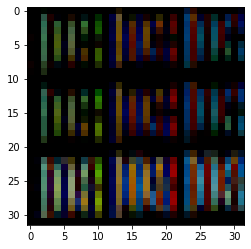

In [ ]:
plt.imshow(images[10].permute(1,2,0).numpy());

#MODEL

In [ ]:
'''

class Model(nn.Module):
    """Class used to initialize model of student/teacher"""

    def __init__(self):

        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #return F.log_softmax(x, dim=1)
        return x

'''

'\n\nclass Model(nn.Module):\n    """Class used to initialize model of student/teacher"""\n\n    def __init__(self):\n\n        super(Model, self).__init__()\n        self.conv1 = nn.Conv2d(1, 20, 5, 1)\n        self.conv2 = nn.Conv2d(20, 50, 5, 1)\n        self.fc1 = nn.Linear(4 * 4 * 50, 500)\n        self.fc2 = nn.Linear(500, 10)\n\n    def forward(self, x):\n\n        x = F.relu(self.conv1(x))\n        x = F.max_pool2d(x, 2, 2)\n        x = F.relu(self.conv2(x))\n        x = F.max_pool2d(x, 2, 2)\n        x = x.view(-1, 4 * 4 * 50)\n        x = F.relu(self.fc1(x))\n        x = self.fc2(x)\n        #return F.log_softmax(x, dim=1)\n        return x\n\n'

In [ ]:


# class Model(nn.Module):
#     """Class used to initialize model of student/teacher"""
#     def __init__(self):
#         super(Model, self).__init__()
#         self.conv1 = nn.Conv2d(3, 96, 3, 1)
#         self.conv2 = nn.Conv2d(96, 96, 3, 1)
#         self.conv3 = nn.Conv2d(96, 96, 3, 1)
#         #self.bn1 = nn.BatchNorm2d(96)
#         self.conv4 = nn.Conv2d(96, 192, 3, 1)
#         self.conv5 = nn.Conv2d(192, 192, 3, 1)
#         self.conv6 = nn.Conv2d(192, 192, 3, 1)
#         self.conv7 = nn.Conv2d(192, 192, 5, 1)
#         #self.bn2 = nn.BatchNorm2d(192)
#         self.fc1 = nn.Linear(2 * 2 * 192, 500)
#         self.fc2 = nn.Linear(500, 10)
#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn1(x)
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn1(x)        
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.conv3(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn1(x)
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.conv4(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn2(x)
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.conv5(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn2(x)
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.conv6(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn2(x)
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.conv7(x))
#         x = F.max_pool2d(x, 3, 1)
#         #x = self.bn2(x)
#         x = F.dropout(x, 0.5)
#         # print(x.shape)
#         x = x.view(-1, 2 * 2 * 192)
#         # print(x.shape)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         #return F.log_softmax(x, dim=1)
#         return x

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

In [ ]:
model = ResNet18()

In [ ]:
summary(model.cuda(), (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
from opacus.dp_model_inspector import DPModelInspector

inspector = DPModelInspector()
inspector.validate(model)

IncompatibleModuleException: ignored

In [ ]:
from opacus.dp_model_inspector import DPModelInspector
from opacus.utils import module_modification

model = module_modification.convert_batchnorm_modules(model)
inspector = DPModelInspector()
print(f"Is the model valid? {inspector.validate(model)}")

Is the model valid? True


In [ ]:
model = model.cuda()

In [ ]:
def accuracy(predictions, dataset):
    """Evaluates accuracy for given set of predictions and true labels.
       Args:
           predictions[torch tensor]: predictions made by classifier.
           labels[torch tensor]: true labels of the dataset.
       Returns:
           accuracy[float]: accuracy of classifier.
    """

    total = 0.0
    correct = 0.0

    for j in range(0, len(dataset)):
        correct += (predictions[j].cpu().long() == dataset[j].cpu().long()).sum().item()
        total += len(dataset[j])

    return (correct / total) * 100

In [ ]:
#model = Model().cuda()

# DP-SGD with eps = 8

In [ ]:
# batchsize = 256
# from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

# #from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent


# rdp = compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=np.sum(train_class_freq), batch_size=batchsize, noise_multiplier=0.66, epochs=18, delta=1e-4)
# #epsilon = get_privacy_spent(5218, rdp, target_delta=1e-5)[0]
# rdp

In [ ]:
# batchsize = 32
# from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

# #from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent


# rdp = compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=np.sum(train_class_freq), batch_size=batchsize, noise_multiplier=0.51, epochs=18, delta=1e-4)
# #epsilon = get_privacy_spent(5218, rdp, target_delta=1e-5)[0]
# rdp

In [ ]:
# train_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
# test_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# PATH_TO_SVHN3 = '/content/SVHN3_1'

# trainset = datasets.ImageFolder(root=PATH_TO_SVHN3+'/train',transform=train_transform)
# testset = datasets.ImageFolder(root=PATH_TO_SVHN3+'/test',transform=test_transform)
# train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
# test_loader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5)

In [ ]:
def accuracy(preds, labels):
    return (preds == labels).mean()

In [ ]:
EPOCHS=50
EPSILON=8
MAX_GRAD_NORM = 1
DELTA = 1e-5
VIRTUAL_BATCH_SIZE=256
N_ACCUMULATION_STEPS = int(VIRTUAL_BATCH_SIZE / BATCH_SIZE)

In [ ]:
from opacus import PrivacyEngine

privacy_engine = PrivacyEngine(
    model,
    sample_rate=SAMPLE_RATE * N_ACCUMULATION_STEPS,
    epochs = EPOCHS,
    target_epsilon = EPSILON,
    #noise_multiplier = 0.8591845703125,
    target_delta = DELTA,
    max_grad_norm=MAX_GRAD_NORM,
)
privacy_engine.attach(optimizer)

print(f"Using sigma={privacy_engine.noise_multiplier} and C={MAX_GRAD_NORM}")

/usr/local/lib/python3.7/dist-packages/opacus/privacy_engine.py:523: UserWarning: A ``sample_rate`` has been provided.Thus, the provided ``batch_size``and ``sample_size`` will be ignored.
  "A ``sample_rate`` has been provided."


Using sigma=0.7225341796874999 and C=1


/usr/local/lib/python3.7/dist-packages/opacus/privacy_engine.py:195: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  "Secure RNG turned off. This is perfectly fine for experimentation as it allows "


In [ ]:
import numpy as np

def train(model, train_loader, optimizer, epoch, device):
    model.train()
    criterion = nn.CrossEntropyLoss()

    losses = []
    top1_acc = []

    for i, (data, target) in enumerate(train_loader):  


        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)

        preds = np.argmax(output.detach().cpu().numpy(), axis=1)
        labels = target.detach().cpu().numpy()
        
        # measure accuracy and record loss
        acc = accuracy(preds, labels)
        losses.append(loss.item())
        top1_acc.append(acc) 
        #print(loss)
        #print(acc)       

        loss.backward()
        	
        # take a real optimizer step after N_VIRTUAL_STEP steps t
        if ((i + 1) % N_ACCUMULATION_STEPS == 0) or ((i + 1) == len(train_loader)):
            optimizer.step()
        else:
            optimizer.virtual_step() # take a virtual step

        if i % 200 == 0:
            epsilon, best_alpha = optimizer.privacy_engine.get_privacy_spent(DELTA)
            print(
                f"\tTrain Epoch: {epoch} \t"
                f"Loss: {np.mean(losses):.6f} "
                f"Acc@1: {np.mean(top1_acc) * 100:.6f} "
                f"(ε = {epsilon:.2f}, δ = {DELTA})"
            )

In [ ]:
def test(model, test_loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    losses = []
    top1_acc = []

    with torch.no_grad():
        for images, target in test_loader:
            images = images.to(device)
            target = target.to(device)

            output = model(images)
            loss = criterion(output, target)
            preds = np.argmax(output.detach().cpu().numpy(), axis=1)
            labels = target.detach().cpu().numpy()
            acc = accuracy(preds, labels)

            losses.append(loss.item())
            top1_acc.append(acc)

    top1_avg = np.mean(top1_acc)

    print(
        f"\tTest set:"
        f"Loss: {np.mean(losses):.6f} "
        f"Acc: {top1_avg * 100:.6f} "
    )
    return np.mean(top1_acc)

In [ ]:
def test1(model, testloader, optimizer):
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    model.eval()
    #correct = 0
    #total = 0

    epoch_loss = 0.
    epoch_acc = 0.
    
    batch_num = 0.
    samples_num = 0.
    
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch_idx, data in  enumerate(testloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            #_, predicted = torch.max(outputs.data, 1)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            true_labels.append(labels.detach().cpu())
            pred_labels.append(preds.detach().cpu())

            # print(f'\r{phase} batch [{batch_idx}/{len(testloader)}]: loss {loss}', end='', flush=True)
            #print(f'\r{phase} batch [{batch_idx}/{len(testloader)}]: loss {torch.mean(loss).item()}', end='', flush=True)
            epoch_loss += torch.mean(loss.detach().cpu()).item()
            epoch_acc += torch.sum(preds == labels.data)
            batch_num += 1
            samples_num += len(labels)

            #total += labels.size(0)
            #correct += (predicted == labels).sum().item()
        #print("TESTING.....")
        return epoch_loss / batch_num, epoch_acc / samples_num, torch.cat(true_labels).numpy(), torch.cat(pred_labels).numpy()

In [ ]:
device

device(type='cuda')

In [ ]:
trainloader

In [ ]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

for i in range(1):

  #model = ResNet18()

  #model = model.cuda()

  #model = module_modification.convert_batchnorm_modules(model)

  for epoch in tqdm(range(EPOCHS)):
    train(model, trainloader, optimizer, epoch + 1, device)



  top1_acc = test(model, testloader, device)

  Test_loss_after_training, test_acc_after_training, true_labels_test, pred_labels_test = test1(model, testloader, optimizer)


  conf_mat_test =confusion_matrix(true_labels_test, pred_labels_test)
  class_accuracy_test=100*conf_mat_test.diagonal()/conf_mat_test.sum(1)

  print("Test results for run {}".format(i+1))
  for label, acc in enumerate(class_accuracy_test):
    print("Test accuracy of class {} is {}".format(str(label), str(round(acc, 2))+"%"))

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


	Train Epoch: 1 	Loss: 2.489107 Acc@1: 5.797101 (ε = 0.19, δ = 1e-05)
	Train Epoch: 1 	Loss: 2.298333 Acc@1: 11.188631 (ε = 2.81, δ = 1e-05)


  2%|▏         | 1/50 [01:14<1:00:53, 74.55s/it]

	Train Epoch: 2 	Loss: 2.320678 Acc@1: 8.888889 (ε = 2.95, δ = 1e-05)
	Train Epoch: 2 	Loss: 2.278670 Acc@1: 12.568743 (ε = 3.09, δ = 1e-05)


  4%|▍         | 2/50 [02:28<59:31, 74.40s/it]  

	Train Epoch: 3 	Loss: 2.302232 Acc@1: 10.156250 (ε = 3.19, δ = 1e-05)
	Train Epoch: 3 	Loss: 2.271401 Acc@1: 14.634518 (ε = 3.29, δ = 1e-05)


  6%|▌         | 3/50 [03:43<58:19, 74.45s/it]

	Train Epoch: 4 	Loss: 2.274033 Acc@1: 22.033898 (ε = 3.37, δ = 1e-05)
	Train Epoch: 4 	Loss: 2.265570 Acc@1: 16.282119 (ε = 3.46, δ = 1e-05)


  8%|▊         | 4/50 [04:58<57:13, 74.64s/it]

	Train Epoch: 5 	Loss: 2.254611 Acc@1: 18.796992 (ε = 3.54, δ = 1e-05)
	Train Epoch: 5 	Loss: 2.256382 Acc@1: 16.894686 (ε = 3.62, δ = 1e-05)


 10%|█         | 5/50 [06:12<55:59, 74.64s/it]

	Train Epoch: 6 	Loss: 2.253902 Acc@1: 22.137405 (ε = 3.68, δ = 1e-05)
	Train Epoch: 6 	Loss: 2.247916 Acc@1: 18.688241 (ε = 3.76, δ = 1e-05)


 12%|█▏        | 6/50 [07:27<54:42, 74.61s/it]

	Train Epoch: 7 	Loss: 2.242959 Acc@1: 20.000000 (ε = 3.82, δ = 1e-05)
	Train Epoch: 7 	Loss: 2.238888 Acc@1: 19.761506 (ε = 3.89, δ = 1e-05)


 14%|█▍        | 7/50 [08:42<53:31, 74.68s/it]

	Train Epoch: 8 	Loss: 2.214650 Acc@1: 19.718310 (ε = 3.95, δ = 1e-05)
	Train Epoch: 8 	Loss: 2.223033 Acc@1: 22.049145 (ε = 4.02, δ = 1e-05)


 16%|█▌        | 8/50 [09:56<52:11, 74.57s/it]

	Train Epoch: 9 	Loss: 2.190290 Acc@1: 25.203252 (ε = 4.08, δ = 1e-05)
	Train Epoch: 9 	Loss: 2.206900 Acc@1: 24.133496 (ε = 4.14, δ = 1e-05)


 18%|█▊        | 9/50 [11:10<50:54, 74.50s/it]

	Train Epoch: 10 	Loss: 2.180453 Acc@1: 23.728814 (ε = 4.20, δ = 1e-05)
	Train Epoch: 10 	Loss: 2.193020 Acc@1: 25.123870 (ε = 4.26, δ = 1e-05)


 20%|██        | 10/50 [12:25<49:37, 74.45s/it]

	Train Epoch: 11 	Loss: 2.170199 Acc@1: 29.629630 (ε = 4.32, δ = 1e-05)
	Train Epoch: 11 	Loss: 2.162377 Acc@1: 27.136704 (ε = 4.38, δ = 1e-05)


 22%|██▏       | 11/50 [13:40<48:28, 74.58s/it]

	Train Epoch: 12 	Loss: 2.094381 Acc@1: 32.000000 (ε = 4.43, δ = 1e-05)
	Train Epoch: 12 	Loss: 2.123252 Acc@1: 28.132043 (ε = 4.49, δ = 1e-05)


 24%|██▍       | 12/50 [14:54<47:14, 74.59s/it]

	Train Epoch: 13 	Loss: 2.059277 Acc@1: 31.531532 (ε = 4.54, δ = 1e-05)
	Train Epoch: 13 	Loss: 2.065300 Acc@1: 30.324854 (ε = 4.60, δ = 1e-05)


 26%|██▌       | 13/50 [16:09<46:03, 74.68s/it]

	Train Epoch: 14 	Loss: 2.106295 Acc@1: 26.845638 (ε = 4.65, δ = 1e-05)
	Train Epoch: 14 	Loss: 2.007386 Acc@1: 32.378925 (ε = 4.70, δ = 1e-05)


 28%|██▊       | 14/50 [17:24<44:49, 74.71s/it]

	Train Epoch: 15 	Loss: 1.943727 Acc@1: 36.184211 (ε = 4.75, δ = 1e-05)
	Train Epoch: 15 	Loss: 1.933471 Acc@1: 35.501348 (ε = 4.81, δ = 1e-05)


 30%|███       | 15/50 [18:38<43:33, 74.66s/it]

	Train Epoch: 16 	Loss: 1.756839 Acc@1: 36.206897 (ε = 4.85, δ = 1e-05)
	Train Epoch: 16 	Loss: 1.834042 Acc@1: 37.703546 (ε = 4.91, δ = 1e-05)


 32%|███▏      | 16/50 [19:53<42:16, 74.61s/it]

	Train Epoch: 17 	Loss: 1.625807 Acc@1: 50.387597 (ε = 4.96, δ = 1e-05)
	Train Epoch: 17 	Loss: 1.762879 Acc@1: 38.849803 (ε = 5.01, δ = 1e-05)


 34%|███▍      | 17/50 [21:08<41:03, 74.67s/it]

	Train Epoch: 18 	Loss: 1.728696 Acc@1: 41.129032 (ε = 5.05, δ = 1e-05)
	Train Epoch: 18 	Loss: 1.718338 Acc@1: 40.528594 (ε = 5.11, δ = 1e-05)


 36%|███▌      | 18/50 [22:23<39:50, 74.72s/it]

	Train Epoch: 19 	Loss: 1.740310 Acc@1: 40.287770 (ε = 5.15, δ = 1e-05)
	Train Epoch: 19 	Loss: 1.672459 Acc@1: 41.963575 (ε = 5.20, δ = 1e-05)


 38%|███▊      | 19/50 [23:37<38:34, 74.67s/it]

	Train Epoch: 20 	Loss: 1.682879 Acc@1: 40.170940 (ε = 5.25, δ = 1e-05)
	Train Epoch: 20 	Loss: 1.641664 Acc@1: 43.164375 (ε = 5.30, δ = 1e-05)


 40%|████      | 20/50 [24:52<37:25, 74.87s/it]

	Train Epoch: 21 	Loss: 1.738501 Acc@1: 40.909091 (ε = 5.34, δ = 1e-05)
	Train Epoch: 21 	Loss: 1.637374 Acc@1: 43.618783 (ε = 5.39, δ = 1e-05)


 42%|████▏     | 21/50 [26:07<36:07, 74.76s/it]

	Train Epoch: 22 	Loss: 1.474920 Acc@1: 50.413223 (ε = 5.43, δ = 1e-05)
	Train Epoch: 22 	Loss: 1.592345 Acc@1: 44.863498 (ε = 5.48, δ = 1e-05)


 44%|████▍     | 22/50 [27:22<34:52, 74.72s/it]

	Train Epoch: 23 	Loss: 1.527893 Acc@1: 45.669291 (ε = 5.53, δ = 1e-05)
	Train Epoch: 23 	Loss: 1.542978 Acc@1: 46.624207 (ε = 5.58, δ = 1e-05)


 46%|████▌     | 23/50 [28:36<33:38, 74.76s/it]

	Train Epoch: 24 	Loss: 1.648378 Acc@1: 45.384615 (ε = 5.62, δ = 1e-05)
	Train Epoch: 24 	Loss: 1.555100 Acc@1: 46.817704 (ε = 5.67, δ = 1e-05)


 48%|████▊     | 24/50 [29:51<32:23, 74.75s/it]

	Train Epoch: 25 	Loss: 1.525082 Acc@1: 50.406504 (ε = 5.71, δ = 1e-05)
	Train Epoch: 25 	Loss: 1.513405 Acc@1: 48.374923 (ε = 5.75, δ = 1e-05)


 50%|█████     | 25/50 [31:06<31:10, 74.81s/it]

	Train Epoch: 26 	Loss: 1.517009 Acc@1: 49.264706 (ε = 5.79, δ = 1e-05)
	Train Epoch: 26 	Loss: 1.483615 Acc@1: 49.970486 (ε = 5.84, δ = 1e-05)


 52%|█████▏    | 26/50 [32:20<29:50, 74.59s/it]

	Train Epoch: 27 	Loss: 1.428506 Acc@1: 50.420168 (ε = 5.88, δ = 1e-05)
	Train Epoch: 27 	Loss: 1.457896 Acc@1: 51.003884 (ε = 5.93, δ = 1e-05)


 54%|█████▍    | 27/50 [33:34<28:33, 74.50s/it]

	Train Epoch: 28 	Loss: 1.479242 Acc@1: 46.715328 (ε = 5.97, δ = 1e-05)
	Train Epoch: 28 	Loss: 1.454125 Acc@1: 51.343145 (ε = 6.02, δ = 1e-05)


 56%|█████▌    | 28/50 [34:49<27:17, 74.43s/it]

	Train Epoch: 29 	Loss: 1.408151 Acc@1: 57.777778 (ε = 6.05, δ = 1e-05)
	Train Epoch: 29 	Loss: 1.448807 Acc@1: 52.302063 (ε = 6.10, δ = 1e-05)


 58%|█████▊    | 29/50 [36:03<26:04, 74.51s/it]

	Train Epoch: 30 	Loss: 1.324587 Acc@1: 56.800000 (ε = 6.14, δ = 1e-05)
	Train Epoch: 30 	Loss: 1.413807 Acc@1: 52.830407 (ε = 6.18, δ = 1e-05)


 60%|██████    | 30/50 [37:18<24:51, 74.57s/it]

	Train Epoch: 31 	Loss: 1.527406 Acc@1: 48.031496 (ε = 6.22, δ = 1e-05)
	Train Epoch: 31 	Loss: 1.415476 Acc@1: 53.521710 (ε = 6.27, δ = 1e-05)


 62%|██████▏   | 31/50 [38:32<23:34, 74.42s/it]

	Train Epoch: 32 	Loss: 1.375824 Acc@1: 63.492063 (ε = 6.30, δ = 1e-05)
	Train Epoch: 32 	Loss: 1.415233 Acc@1: 54.203868 (ε = 6.35, δ = 1e-05)


 64%|██████▍   | 32/50 [39:48<22:25, 74.73s/it]

	Train Epoch: 33 	Loss: 1.509180 Acc@1: 54.782609 (ε = 6.39, δ = 1e-05)
	Train Epoch: 33 	Loss: 1.402359 Acc@1: 54.560677 (ε = 6.43, δ = 1e-05)


 66%|██████▌   | 33/50 [41:03<21:10, 74.75s/it]

	Train Epoch: 34 	Loss: 1.548456 Acc@1: 49.572650 (ε = 6.47, δ = 1e-05)
	Train Epoch: 34 	Loss: 1.397929 Acc@1: 54.893854 (ε = 6.51, δ = 1e-05)


 68%|██████▊   | 34/50 [42:17<19:53, 74.57s/it]

	Train Epoch: 35 	Loss: 1.470784 Acc@1: 50.387597 (ε = 6.55, δ = 1e-05)
	Train Epoch: 35 	Loss: 1.356258 Acc@1: 56.233141 (ε = 6.59, δ = 1e-05)


 70%|███████   | 35/50 [43:31<18:36, 74.40s/it]

	Train Epoch: 36 	Loss: 1.276853 Acc@1: 57.281553 (ε = 6.63, δ = 1e-05)
	Train Epoch: 36 	Loss: 1.354508 Acc@1: 57.173492 (ε = 6.67, δ = 1e-05)


 72%|███████▏  | 36/50 [44:45<17:22, 74.46s/it]

	Train Epoch: 37 	Loss: 1.293623 Acc@1: 58.461538 (ε = 6.71, δ = 1e-05)
	Train Epoch: 37 	Loss: 1.355146 Acc@1: 56.776512 (ε = 6.75, δ = 1e-05)


 74%|███████▍  | 37/50 [46:00<16:07, 74.40s/it]

	Train Epoch: 38 	Loss: 1.564725 Acc@1: 51.923077 (ε = 6.78, δ = 1e-05)
	Train Epoch: 38 	Loss: 1.366028 Acc@1: 57.186758 (ε = 6.83, δ = 1e-05)


 76%|███████▌  | 38/50 [47:14<14:51, 74.32s/it]

	Train Epoch: 39 	Loss: 1.113224 Acc@1: 60.330579 (ε = 6.86, δ = 1e-05)
	Train Epoch: 39 	Loss: 1.372230 Acc@1: 57.370449 (ε = 6.90, δ = 1e-05)


 78%|███████▊  | 39/50 [48:28<13:37, 74.29s/it]

	Train Epoch: 40 	Loss: 1.394033 Acc@1: 55.797101 (ε = 6.94, δ = 1e-05)
	Train Epoch: 40 	Loss: 1.353486 Acc@1: 57.720445 (ε = 6.98, δ = 1e-05)


 80%|████████  | 40/50 [49:42<12:23, 74.32s/it]

	Train Epoch: 41 	Loss: 1.545629 Acc@1: 56.410256 (ε = 7.01, δ = 1e-05)
	Train Epoch: 41 	Loss: 1.361740 Acc@1: 57.721575 (ε = 7.05, δ = 1e-05)


 82%|████████▏ | 41/50 [50:57<11:10, 74.45s/it]

	Train Epoch: 42 	Loss: 1.567672 Acc@1: 52.713178 (ε = 7.09, δ = 1e-05)
	Train Epoch: 42 	Loss: 1.348986 Acc@1: 58.599709 (ε = 7.13, δ = 1e-05)


 84%|████████▍ | 42/50 [52:11<09:54, 74.36s/it]

	Train Epoch: 43 	Loss: 1.342206 Acc@1: 56.250000 (ε = 7.17, δ = 1e-05)
	Train Epoch: 43 	Loss: 1.361361 Acc@1: 58.335187 (ε = 7.21, δ = 1e-05)


 86%|████████▌ | 43/50 [53:26<08:41, 74.46s/it]

	Train Epoch: 44 	Loss: 1.406796 Acc@1: 59.259259 (ε = 7.24, δ = 1e-05)
	Train Epoch: 44 	Loss: 1.341240 Acc@1: 59.134163 (ε = 7.28, δ = 1e-05)


 88%|████████▊ | 44/50 [54:40<07:26, 74.48s/it]

	Train Epoch: 45 	Loss: 1.273635 Acc@1: 58.558559 (ε = 7.31, δ = 1e-05)
	Train Epoch: 45 	Loss: 1.321146 Acc@1: 59.797941 (ε = 7.35, δ = 1e-05)


 90%|█████████ | 45/50 [55:55<06:12, 74.58s/it]

	Train Epoch: 46 	Loss: 1.220527 Acc@1: 57.983193 (ε = 7.39, δ = 1e-05)
	Train Epoch: 46 	Loss: 1.334313 Acc@1: 59.329455 (ε = 7.43, δ = 1e-05)


 92%|█████████▏| 46/50 [57:10<04:58, 74.52s/it]

	Train Epoch: 47 	Loss: 1.406325 Acc@1: 62.857143 (ε = 7.46, δ = 1e-05)
	Train Epoch: 47 	Loss: 1.334979 Acc@1: 59.597663 (ε = 7.50, δ = 1e-05)


 94%|█████████▍| 47/50 [58:24<03:43, 74.40s/it]

	Train Epoch: 48 	Loss: 1.596972 Acc@1: 58.914729 (ε = 7.53, δ = 1e-05)
	Train Epoch: 48 	Loss: 1.301209 Acc@1: 60.565759 (ε = 7.57, δ = 1e-05)


 96%|█████████▌| 48/50 [59:38<02:28, 74.40s/it]

	Train Epoch: 49 	Loss: 1.267318 Acc@1: 59.574468 (ε = 7.60, δ = 1e-05)
	Train Epoch: 49 	Loss: 1.316887 Acc@1: 60.703163 (ε = 7.64, δ = 1e-05)


 98%|█████████▊| 49/50 [1:00:53<01:14, 74.48s/it]

	Train Epoch: 50 	Loss: 1.260311 Acc@1: 62.142857 (ε = 7.68, δ = 1e-05)
	Train Epoch: 50 	Loss: 1.333374 Acc@1: 60.815006 (ε = 7.71, δ = 1e-05)


100%|██████████| 50/50 [1:02:07<00:00, 74.56s/it]


	Test set:Loss: 1.275472 Acc: 61.510417 
Test results for run 1
Test accuracy of class 0 is 66.6%
Test accuracy of class 1 is 75.7%
Test accuracy of class 2 is 64.9%
Test accuracy of class 3 is 29.1%
Test accuracy of class 4 is 82.3%
Test accuracy of class 5 is 70.2%
Test accuracy of class 6 is 56.7%
Test accuracy of class 7 is 84.8%
Test accuracy of class 8 is 9.4%
Test accuracy of class 9 is 50.5%
